---
> # Deep Learning EX-2

> ANN Model for Single and Multi-Classification

> Manan Gajjar : `201911027`
---



In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow import keras
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import MinMaxScaler, Normalizer
from sklearn.utils import shuffle
print(tf.__version__)

2.3.0


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Binary Classification ANN

In [ ]:
heart = pd.read_csv("/content/drive/My Drive/Deep Learning/Lab2/heart.csv")
print(heart.shape)
heart.head()

(303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


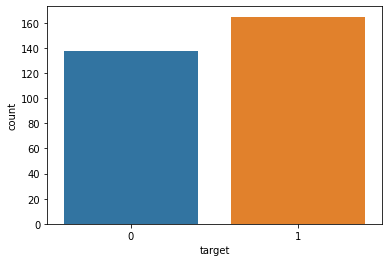

In [ ]:
sns.countplot(heart['target'],label='Count')

In [ ]:
features = list(heart.columns.values)
features.remove('target')
X = heart[features]
y = heart['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print("Training Data :", X_train.shape)
print("Training Label :", y_train.shape)
print("Testing Data :", X_test.shape)
print("Testing Label :", y_test.shape)
X_train.head()

# train,test = train_test_split(heart, test_size=0.3, random_state=42)
# X_train,y_train = train.iloc[:,:-1],train.iloc[:,-1:]
# X_test, y_test = test.iloc[:,:-1], test.iloc[:,-1:]

Training Data : (212, 13)
Training Label : (212,)
Testing Data : (91, 13)
Testing Label : (91,)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
137,62,1,1,128,208,1,0,140,0,0.0,2,0,2
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
284,61,1,0,140,207,0,0,138,1,1.9,2,1,3
44,39,1,2,140,321,0,0,182,0,0.0,2,0,2
139,64,1,0,128,263,0,1,105,1,0.2,1,1,3


In [ ]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scalled = scaler.transform(X_train)
X_test_scalled = scaler.transform(X_test)

In [ ]:
# model = keras.Sequential([
#     keras.layers.Flatten(input_shape=(13,)),
#     keras.layers.Dense(16, activation=tf.nn.relu),
# 	keras.layers.Dense(16, activation=tf.nn.relu),
#     keras.layers.Dense(1, activation=tf.nn.sigmoid),
# ])
model = tf.keras.models.Sequential()
model.add(tf.keras.Input(shape=13))
model.add(tf.keras.layers.Dense(10, activation='relu'))
model.add(tf.keras.layers.Dense(6, activation='relu'))
model.add(tf.keras.layers.Dense(1,activation='sigmoid'))
model.output_shape

(None, 1)

In [ ]:
model.compile(optimizer='sgd', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 10)                140       
_________________________________________________________________
dense_18 (Dense)             (None, 6)                 66        
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 7         
Total params: 213
Trainable params: 213
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train_scalled, y_train, epochs=100, batch_size=1)

Epoch 1/50
212/212 [==============================] - 0s 786us/step - loss: 0.6690 - accuracy: 0.5802
Epoch 2/50
212/212 [==============================] - 0s 772us/step - loss: 0.5890 - accuracy: 0.7406
Epoch 3/50
212/212 [==============================] - 0s 783us/step - loss: 0.5172 - accuracy: 0.8208
Epoch 4/50
212/212 [==============================] - 0s 772us/step - loss: 0.4674 - accuracy: 0.8491
Epoch 5/50
212/212 [==============================] - 0s 809us/step - loss: 0.4332 - accuracy: 0.8585
Epoch 6/50
212/212 [==============================] - 0s 884us/step - loss: 0.4089 - accuracy: 0.8632
Epoch 7/50
212/212 [==============================] - 0s 860us/step - loss: 0.3890 - accuracy: 0.8396
Epoch 8/50
212/212 [==============================] - 0s 834us/step - loss: 0.3750 - accuracy: 0.8774
Epoch 9/50
212/212 [==============================] - 0s 857us/step - loss: 0.3626 - accuracy: 0.8443
Epoch 10/50
212/212 [==============================] - 0s 859us/step - loss: 0.350

In [ ]:
test_loss, test_acc = model.evaluate(X_test_scalled, y_test)
print('Test accuracy:', test_acc)

3/3 [==============================] - 0s 2ms/step - loss: 0.7794 - accuracy: 0.7912
Test accuracy: 0.791208803653717


# Multi Classification ANN

In [ ]:
mobileDS = pd.read_csv("/content/drive/My Drive/Deep Learning/Lab2/datasets_11167_15520_train_Mobile.csv")
print(mobileDS.shape)
mobileDS.head()

(2000, 21)


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


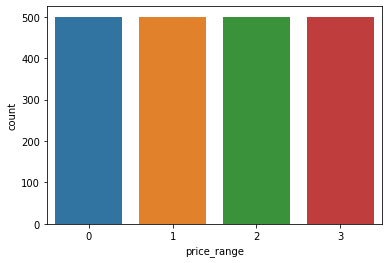

In [ ]:
sns.countplot(mobileDS['price_range'],label='Count')

In [ ]:
features = list(mobileDS.columns.values)
features.remove('price_range')
X = mobileDS[features]
y = mobileDS['price_range']
y = pd.DataFrame(y.values.reshape(-1,1))
print(X.shape, y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print("Training Data :", X_train.shape)
print("Training Label :", y_train.shape)
print("Testing Data :", X_test.shape)
print("Testing Label :", y_test.shape)
X_train.head()

(2000, 20) (2000, 1)
Training Data : (1400, 20)
Training Label : (1400, 1)
Testing Data : (600, 20)
Testing Label : (600, 1)


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
1719,833,1,0.6,1,0,1,27,0.3,145,4,2,649,1290,586,19,8,19,1,0,1
1702,1424,1,2.9,1,0,0,20,0.6,180,5,0,181,1199,2658,15,0,19,1,0,0
1287,860,1,1.3,1,1,1,49,0.7,141,6,13,692,979,3869,16,14,20,1,1,1
482,1330,1,1.3,1,14,0,3,0.3,83,5,17,980,1262,463,14,6,11,0,0,1
768,1149,1,2.2,0,4,0,30,0.2,106,6,5,1617,1675,3755,17,14,8,1,0,0


In [ ]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scalled = scaler.transform(X_train)
X_test_scalled = scaler.transform(X_test)

encoder = preprocessing.OneHotEncoder(sparse=False).fit(y_train)
print("categories",encoder.categories_)

y_train_encoded = encoder.transform(y_train)
y_test_encoded = encoder.transform(y_test)
print(y_train_encoded.shape)

categories [array([0, 1, 2, 3])]
(1400, 4)


In [ ]:
model2 = tf.keras.models.Sequential()
model2.add(tf.keras.Input(shape=20))
# model2.add(tf.keras.layers.Dense(15, activation='relu'))
model2.add(tf.keras.layers.Dense(12, activation='relu'))
model2.add(tf.keras.layers.Dense(8, activation='relu'))
model2.add(tf.keras.layers.Dense(4,activation='softmax'))
model2.output_shape

(None, 4)

In [ ]:
model2.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])
model2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                252       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 36        
Total params: 392
Trainable params: 392
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model2.fit(X_train_scalled, y_train_encoded, epochs=100, batch_size=1)

Epoch 1/100
1400/1400 [==============================] - 2s 2ms/step - loss: 1.3521 - accuracy: 0.3043
Epoch 2/100
1400/1400 [==============================] - 2s 2ms/step - loss: 0.9046 - accuracy: 0.6107
Epoch 3/100
1400/1400 [==============================] - 2s 2ms/step - loss: 0.4458 - accuracy: 0.8393
Epoch 4/100
1400/1400 [==============================] - 2s 2ms/step - loss: 0.2991 - accuracy: 0.8979
Epoch 5/100
1400/1400 [==============================] - 2s 2ms/step - loss: 0.2280 - accuracy: 0.9236
Epoch 6/100
1400/1400 [==============================] - 2s 2ms/step - loss: 0.1918 - accuracy: 0.9307
Epoch 7/100
1400/1400 [==============================] - 2s 2ms/step - loss: 0.1619 - accuracy: 0.9450
Epoch 8/100
1400/1400 [==============================] - 2s 2ms/step - loss: 0.1444 - accuracy: 0.9543
Epoch 9/100
1400/1400 [==============================] - 3s 2ms/step - loss: 0.1271 - accuracy: 0.9543
Epoch 10/100
1400/1400 [==============================] - 3s 2ms/step - l

In [ ]:
test_loss, test_acc = model2.evaluate(X_test_scalled, y_test_encoded)
print('Test accuracy:', test_acc)

19/19 [==============================] - 0s 2ms/step - loss: 0.4376 - accuracy: 0.9250
Test accuracy: 0.925000011920929
